# 1. 머신러닝 모델 만들기

In [1]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

1.4.0


## 데이터 세트 로딩
- 사이킷런의 붓꽃 데이터(iris) 실습

In [3]:
from sklearn.datasets import load_iris

# iris 데이터 로딩 => feature(X) label(y) 불러오기
iris = load_iris()
iris_feature = iris.data
iris_label = iris.target

print('iris feature :\n', iris_feature[:3])
print('iris label :', iris_label[:3])

iris feature :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
iris label : [0 0 0]


In [14]:
# 판다스 DF 정리
import pandas as pd

iris_df = pd.DataFrame(data=iris_feature, columns=iris.feature_names)
iris_df['label'] = iris_label

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Feature 다루기
- 학습 / 테스트 데이터 분리

In [6]:
from sklearn.model_selection import train_test_split

# feature와 label 모두 train & test 분리 => train_test_split 함수 사용
#   train_test_split => 모든 데이터를 랜덤하게 섞고(shuffle) 분할(split)
#   feature와 target의 개수는 항상 일치해야 에러가 안 난다.
#   random state를 고정시켜놓으면 여러번 반복하더라도 처음 무작위 형태가 동일하게 반복 출력된다.
X_train, X_test, y_train, y_test = train_test_split(
    iris_df.drop('label', axis=1),
    iris_df['label'],
    test_size=0.2,
    random_state=1
)

In [8]:
# test_size=0.2로 설정해서 train:test = 8:2 확인 가능
#  (행의 개수, 열의 개수) => 가로로 잘리기 때문에 행만 바뀐다.
X_train.shape, X_test.shape

((120, 4), (30, 4))

## 머신러닝 모델 훈련
- 훈련: fit(X, y)

In [12]:
# 사이킷런에서 제공하는 의사결정나무 분류기
from sklearn.tree import DecisionTreeClassifier

# (1) 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=1)

# (2) 학습(fit) 수행
#     학습할 때는 훈련 데이터 세트를 사용한다.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## 테스트 데이터 세트로 예측(predict)

In [16]:
# 학습 완료된 dt_clf => 테스트 데이터로 예측 수행
#   pred = ^y (예측 y 값)
pred = dt_clf.predict(X_test)
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

## 모델 성능 확인(metric)

In [17]:
# sklearn.metrics => 사이킷런의 평가 모듈
#   accuracy_score => 실제 라벨과 예측 라벨 결과를 차례대로 input하여 정확도 계산
#   y_test: 테스트 실제 값 (정답)    pred: 예측 값

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9667


# 2. 모듈 사용하기

## 데이터 로딩

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 데이터를 섞지 않고 잘라내는 경우
- 랜덤성 부여X, shuffle 수행을 하지 않는다면?

In [19]:
test_size = 30

X_test = X[: test_size]
y_test = y[: test_size]

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
X_train = X[test_size: ]
y_train = y[test_size: ]

print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [23]:
# 데이터를 섞지 않은 채로 머신러닝 훈련 진행 (fit)
#   train_test_split 과정을 적용하지 않았다.
#   train_test_split => 모든 데이터를 랜덤하게 섞고(shuffle) 분할(split)

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# data 앞쪽의 나열된 0에 대해서는 잘 맞추지만, 뒷쪽의 1과 2는 테스트를 못 한다.
#   test에 대한 예측 성공률이 100% == 위험한 모델
#   성공률이 너무 높다면 내용 기록하고 추후 개선 가능해야 한다.

from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
acc_result = accuracy_score(y_test, pred)

print('예측 정확도: {0:.2f}'.format(acc_result))

예측 정확도: 1.00


## train_test_split 활용
- 모든 데이터를 랜덤하게 섞고(shuffle) 분할(split)한다.

In [30]:
# stratify 옵션 미사용한 경우
# random_state는 마음대로 넣어도 되지만, 일반적으로 42 많이 사용한다.
#   42: 은하수를 여행하는 히치하이커라는 책에서 슈퍼컴퓨터가 언급한 세상의 끝 수
#   121: 비교적 분리가 잘 되는 숫자

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=121
)

In [28]:
# 각 레이블의 비율을 시각화
#   sns.set_theme() => seaborn 테마 설정

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

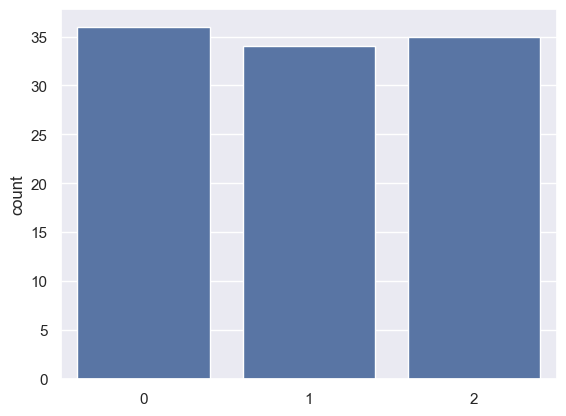

In [31]:
# 훈련 데이터 내 각 클래스 값의 비율을 시각화한 형태

sns.countplot(x=y_train)
plt.show()

## stratify 옵션 사용
- 지정한 벡터의 값에 대해, 원본 데이터 비율에 맞게 훈련 세트와 테스트 세트를 분할하는 계층적 분할을 수행한다.
- 반드시 이산형 형태의 값만 있어야 한다.
    - 카테고리 형식을 의미하는 정수 형태의 값

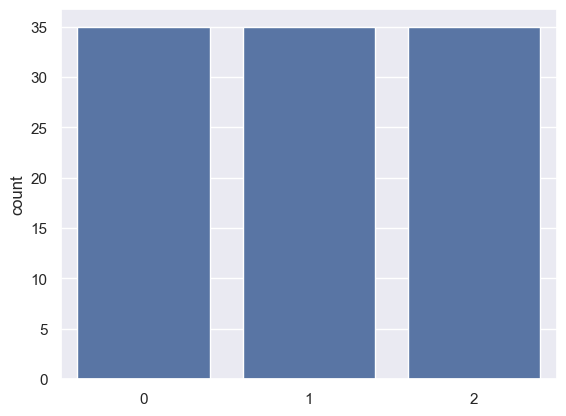

In [35]:
# stratify 옵션 사용한 경우
# 훈련 데이터 내 각 클래스의 비율만큼 분할 수행된다.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=121,
    stratify=y
)

sns.countplot(x=y_train)
plt.show()

## K-Fold, Stratified K-Fold
- 실제로 잘 사용하지 않는다. 간편하게 `cross_val_score`을 사용.
- K-Fold: 지정한 폴드의 개수 k만큼 데이터를 나눈다.  (회귀모델 사용)
- Stratified K-Fold: 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포가 유사하도록 검증 데이터를 추출한다.  (분류모델 사용)
- 전체 데이터 세트를 k번 접어서 교차 검증을 진행한다.
- 학습 데이터를 다시 분할하여, 학습 데이터 (train) & 검증 데이터 (valid) 세트로 나눈다.
    - 검증 데이터 세트를 여러번 바꿔서 미리 교차 검증 한다.
    - 각 검증 평가 값을 평균내어 최종 평가를 한다.

In [41]:
# K-Fold => 회귀모델에서 사용

from sklearn.model_selection import KFold
import numpy as np

In [38]:
# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# KFold 객체의 split() 함수를 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, valid_indices in kfold.split(X):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print("훈련 세트의 인덱스 : {}".format(train_indices))
  print()

검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 

In [44]:
# 각 폴드에서의 정확도를 담아 평균을 내기 위한 용도로 빈 배열 배치 []
n_iter = 0
cv_accuracy = []

kfold = KFold(n_splits=3)

for train_indices, valid_indices in kfold.split(X):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 객체 생성과 동시에 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [42]:
# Stratified K Fold => 분류모델에서 사용

from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

# 계층적 분할의 기준 == y
for train_indices, valid_indices in skfold.split(X, y):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



In [51]:
# 각 폴드에서의 정확도를 담아 평균을 내기 위한 용도로 빈 배열 배치 []
n_iter = 0
cv_accuracy = []

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 객체 생성과 동시에 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) 

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9400
3 번째 폴드에 대한 평가 결과 : 0.9800

최종 결과 : 0.9666666666666667


## cross_val_score
- K-Fold를 이용한 교차 검증 방법을 간편화한 사이킷런의 검증 함수.
- 폴드 세트의 추출, 학습, 예측, 평가를 한번에 수행할 수 있다.

In [54]:
# estimator 자리에 Classifier가 들어가면 자동으로 Stratified K-Fold 이용한 교차검증 실시한다.
#   scoring => 예측 성능 평가 방식
#   cv => 폴드의 개수
#   n_jobs => 사용할 cpu의 개수 (-1로 설정하면 모든 cpu 사용)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(),
    X,
    y,
    scoring='accuracy',
    cv=3
)

In [66]:
import numpy as np

print("폴드 별 정확도 : {}".format(scores))
print("평균 정확도 : {}".format(np.mean(scores)))

폴드 별 정확도 : [0.98 0.92 1.  ]
평균 정확도 : 0.9666666666666667


## GridSearchCV를 이용한 하이퍼 파라미터 튜닝 & 교차검증
- 교차 검증과 하이퍼 파라미터 튜닝을 한번에 한다.
- 하이퍼 파라미터 값을 나열한 후 GridSearchCV에게 전달하면 값을 조합한 후 교차 검증까지 이루어진다.
- 하이퍼 파라미터란?
    - 머신러닝 모델에게 최초 부여되는 초기 설정 값으로, H.P에 의해 모델 성능이 조절되기 때문에 최적 튜닝이 가능하다.
- 딕셔너리를 활용하여 하이퍼 파라미터 정의 (하이퍼 파라미터 목록에 여러 개의 딕셔너리도 이용 가능하다.)
    - 딕셔너리의 key: 하이퍼 파라미터의 이름 (변수명)
    - 딕셔너리의 value: 하이퍼 파라미터에 들어갈 값의 목록 (리스트로 정의)

In [68]:
# 아래 조합으로 만들 수 있는 경우의 수는 6가지로, GridSearch가 6개의 조합을 각각 넣어서 테스트 해준다.
#   (참고) GridSearch가 없이 테스트 한다면
#   dt_1 = DecisionTreeClassifier(max_depth=1, min_samples_split=2)
#   dt_2 = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
#   dt_3 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
#   dt_4 = DecisionTreeClassifier(max_depth=1, min_samples_split=3)
#   dt_5 = DecisionTreeClassifier(max_depth=2, min_samples_split=3)
#   dt_6 = DecisionTreeClassifier(max_depth=3, min_samples_split=3)

parameters = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 3]
}

In [75]:
# 하이퍼 파라미터의 조합만으로 6개의 모델이 생성되고, 6개 각각에게 폴드가 3개씩 주어지기 때문에 총 18개의 모델이 생성된다.
#   param_grid => GridSearch를 수행하기 위한 하이퍼 파라미터의 목록 전달 (H.P목록이 들어있는 단일~다수의 딕셔너리)
#   refit => True로 설정하면 가장 좋은 파라미터 설정으로 재학습 시킨다.
#   return_train_score => 훈련 결과에 대한 평가 점수를 확인할 수 있다.

from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    return_train_score=True,
    n_jobs=-1,
    cv=3
)

grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [74]:
# GridSearchCV의 결과는 cv_results_ 변수에 들어있다.
#   총 18개의 모델이 생성되지만, cv는 평균치가 도출되기 때문에 최종적으로 6개가 출력된다.
#   results는 딕셔너리로 출력되기 때문에 아래와 같이 결과를 판다스 df으로 정리해서 출력

import pandas as pd

results = grid_dt_clf.cv_results_
gs_result_df = pd.DataFrame(results)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001995,0.000000e+00,0.001995,0.000000e+00,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.676471,0.666667,0.666667,0.669935,0.004622,5,0.666667,0.671642,0.671642,0.669983,0.002345
1,0.002327,4.700779e-04,0.001330,4.700779e-04,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.676471,0.666667,0.666667,0.669935,0.004622,5,0.666667,0.671642,0.671642,0.669983,0.002345
2,0.001996,1.236308e-06,0.001996,2.135440e-06,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.941176,0.939394,0.878788,0.919786,0.028999,4,0.954545,0.970149,0.970149,0.964948,0.007356
3,0.001665,4.708200e-04,0.001467,4.093528e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.970588,0.939394,0.878788,0.929590,0.038113,3,0.954545,0.970149,0.970149,0.964948,0.007356
4,0.001995,5.150430e-07,0.001330,4.705275e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.970588,0.939394,0.969697,0.959893,0.014500,1,0.969697,0.970149,0.985075,0.974974,0.007145
5,0.001662,4.697409e-04,0.000998,1.123916e-07,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.970588,0.939394,0.969697,0.959893,0.014500,1,0.954545,0.970149,0.985075,0.969923,0.012465


In [76]:
# 최고의 성능을 냈던 하이퍼 파라미터 찾기

print(f'최고의 성능을 냈던 하이퍼 파라미터: {grid_dt_clf.best_params_}')

최고의 성능을 냈던 하이퍼 파라미터: {'max_depth': 3, 'min_samples_split': 2}


In [77]:
# 최고 성능 모델의 정확도 (검증 세트에 대한 최고 점수)

print(f'최고의 성능 모델의 정확도: {grid_dt_clf.best_score_}')

최고의 성능 모델의 정확도: 0.9598930481283423


In [82]:
# 테스트 데이터로 나온 예측값을 이용하여 모델 성능 확인 (예측 정확도 출력)

pred = grid_dt_clf.predict(X_test)
print("테스트 세트의 정확도 : {:.3f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 1.000


In [83]:
# 최고의 결과를 냈던 추정기(estimator) 가져오기

best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [85]:
# 최고 결과 추정기로 예측 및 예측값을 이용한 모델 성능 확인(예측 정확도)
pred = best_dt_clf.predict(X_test)
accuracy_score(y_test, pred)

1.0

# 3. 데이터 전처리

## 데이터 인코딩
- 머신러닝 알고리즘은 문자열 데이터 속성을 입력받지 않으므로, 모두 숫자형으로 인코딩되어야 한다.
    - 숫자로 변환 불가능한 문자열 데이터도 존재한다.
- 종류:
    - 레이블(Lable) 인코딩
    - 원-핫(One-Hot) 인코딩

In [2]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

## 레이블 인코딩
- y가 문자열인 경우, y를 바꿔주는 인코딩 방법

In [3]:
# 인코딩 수행 코드

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(items)

labels = encoder.transform(items)

In [4]:
# 카테고리 문자열을 정수로 바꿔준다.
#   encoder.classes_ => 정수로 바꾸기 전 라벨 종류(클래스 값)을 출력한다.
print('인코딩 변환 값: {}'.format(labels))
print('인코딩 클래스: {}'.format(encoder.classes_))

인코딩 변환 값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [5]:
# 디코딩 => 인코딩의 반댓말로, 컴퓨터가 알아볼 수 있는 정보에서 사람이 알아볼 수 있는 정보로 바꾸는 과정
#   ex. chat gpt 등도 숫자로 인코딩된 내용을 사람의 말로 디코딩하는 과정을 거친다.

encoder.inverse_transform([1, 5, 4, 2, 3, 5, 3, 3])

array(['냉장고', '컴퓨터', '전자렌지', '믹서', '선풍기', '컴퓨터', '선풍기', '선풍기'],
      dtype='<U4')

## 원-핫 인코딩
- 1개의 컬럼만 의미있다는 뜻으로, 고유 값에 해당하는 Feature 유형 컬럼에만 1로 표시한다.
    - 나머지는 더미 특성, 더미 컬럼으로 불린다.
- 보통 Feature에 사용되기 때문에 2차원 배열을 적용한다.
- 배열이나 array에 대한 변환이 쉽기 때문에 넘파이를 사용한다. (넘파이 배열 = nd.array)